# Dataframes e SparkSQL

Spark oferece abstrações de mais alto nível chamadas APIs estruturadas. Ao todo, são três: Dataframes, Datasets e SparkSQL. 

![Pilha de APIs, disponível em: https://www.oreilly.com/library/view/spark-the-definitive/9781491912201/](https://izhangzhihao.github.io/assets/images/spark-05.png)

Datasets não são implementados em PySpark, porém veremos nesse notebook exemplos de uso das outras duas.

**Dataframes** são estruturas tabulares, assim como os DataFrames de Pandas. A diferença, aqui, é que Dataframes em Spark são _distribuídos_ e construídos em cima de RDDs. 

**SparkSQL** é um conjunto de funcionalidades que são operadas em Dataframes. Veremos que podemos manipular Dataframes tanto programaticamente (através de _transformações_) quanto por linguagem SQL. Além disso, SparkSQL oferece uma série de outras ferramentas para a realização de operações tabulares distribuídas.

Vamos começar importando PySpark e criando um objeto `SparkContext`, assim como fizemos anteriormente. Lembre-se que `SparkContext` é a porta de entrada para manipulação de RDDs.

In [1]:
import findspark
findspark.init()

import pyspark
import random

sc = pyspark.SparkContext(appName='Dataframes e SparkSQL')

2021-12-11 14:55:08,790 WARN util.Utils: Your hostname, bigdatavm-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
2021-12-11 14:55:08,790 WARN util.Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2021-12-11 14:55:09,526 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# O objeto SparkSession

Para manipularmos Dataframes e utilizar as funções do SparkSQL, porém, precisamos criar um objeto `SparkSession`. O `SparkSession` é um objeto que é construído em cima do SparkContext, e é o ponto de entrada para as APIs estruturadas do Spark. 
https://imgs.developpaper.com/imgs/147289973-592685e12263f_articlex.png ![SparkSession vs SparkContext em: https://developpaper.com/application-sparksession-sparkcontext-and-rdd-in-spark-and-their-extensions/](https://imgs.developpaper.com/imgs/147289973-592685e12263f_articlex.png)

Para inicializar um SparkSession, importamos sua definição de `pyspark.sql` e criamos um objeto com `SparkSession.builder.getOrCreate()`. Esse método checa se já existe um `SparkSession` ativo, e se não existir, cria um novo. Observe que não precisei mencionar o `SparkContext`. Ele recupera sua instância automaticamente, ou a cria se não existir também.

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

print(spark)

# Criando Dataframes

Dataframes são objetos tabulares (lembre-se do _Pandas_) distribuídos. Você pode criar um dataframe lendo arquivos csv, JSON, [ORC](https://orc.apache.org/) e [Parquet](https://github.com/apache/parquet-format). Além disso, você pode criar Dataframes a partir de RDDs também. 

Vamos fazer alguns exemplos com a versão simplificada de leitura e criação de arquivos. Para mais opções, consultar a [documentação](https://spark.apache.org/docs/latest/sql-data-sources-load-save-functions.html):

In [3]:
# importando de um arquivo csv

flights_df = spark.read.csv('file:///home/bigdata-vm/Desktop/BigDataAulasPUC/Datasets/Flights_old/flights.csv')
flights_df.show(10)

+----------+-----+---+---+---+----+------+----+------+------+-------+
|       _c0|  _c1|_c2|_c3|_c4| _c5|   _c6| _c7|   _c8|   _c9|   _c10|
+----------+-----+---+---+---+----+------+----+------+------+-------+
|2014-04-01|19805|  1|JFK|LAX|0854| -6.00|1217|  2.00|355.00|2475.00|
|2014-04-01|19805|  2|LAX|JFK|0944| 14.00|1736|-29.00|269.00|2475.00|
|2014-04-01|19805|  3|JFK|LAX|1224| -6.00|1614| 39.00|371.00|2475.00|
|2014-04-01|19805|  4|LAX|JFK|1240| 25.00|2028|-27.00|264.00|2475.00|
|2014-04-01|19805|  5|DFW|HNL|1300| -5.00|1650| 15.00|510.00|3784.00|
|2014-04-01|19805|  6|OGG|DFW|1901|126.00|0640| 95.00|385.00|3711.00|
|2014-04-01|19805|  7|DFW|OGG|1410|125.00|1743|138.00|497.00|3711.00|
|2014-04-01|19805|  8|HNL|DFW|1659|  4.00|0458|-22.00|398.00|3784.00|
|2014-04-01|19805|  9|JFK|LAX|0648| -7.00|1029| 19.00|365.00|2475.00|
|2014-04-01|19805| 10|LAX|JFK|2156| 21.00|0556|  1.00|265.00|2475.00|
+----------+-----+---+---+---+----+------+----+------+------+-------+
only showing top 10 

In [26]:
# criando a partir de um RDD

text_rdd = sc.textFile('file:///home/bigdata-vm/Desktop/BigDataAulasPUC/Datasets/shakespeare.txt')
print(text_rdd.take(5))

def extract_key(line):
    split = line.split('\t', 1)
    return (split[0], split[1].replace('\t', ' ').strip())

text_rdd = text_rdd.map(extract_key)
print(text_rdd.take(5))

text_df = spark.createDataFrame(text_rdd)
text_df.show(5)

['hamlet@0\t\tHAMLET', 'hamlet@8\t', 'hamlet@9\t', 'hamlet@10\t\tDRAMATIS PERSONAE', 'hamlet@29\t']
[('hamlet@0', 'HAMLET'), ('hamlet@8', ''), ('hamlet@9', ''), ('hamlet@10', 'DRAMATIS PERSONAE'), ('hamlet@29', '')]
+---------+-----------------+
|       _1|               _2|
+---------+-----------------+
| hamlet@0|           HAMLET|
| hamlet@8|                 |
| hamlet@9|                 |
|hamlet@10|DRAMATIS PERSONAE|
|hamlet@29|                 |
+---------+-----------------+
only showing top 5 rows



# Schemas

Quando lendo de um csv ou criando um Dataframe a partir de um RDD, o Spark pode fazer múltiplas leituras para automaticamente tentar inferir qual é o _Schema_ do Dataframe, ou seja, qual é a tipagem de cada coluna e se ela pode ter ou não valores _null_. 

In [5]:
import time

flights_df.printSchema()

#checar schema
start_time = time.time()
flights_df = spark.read.csv('file:///home/bigdata-vm/Desktop/BigDataAulasPUC/Datasets/Flights_old/flights.csv', inferSchema=True)
print(time.time() - start_time)
flights_df.printSchema()


root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)



1.6830875873565674
root
 |-- _c0: string (nullable = true)
 |-- _c1: integer (nullable = true)
 |-- _c2: integer (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: integer (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: integer (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: double (nullable = true)
 |-- _c10: double (nullable = true)



A inferência de _Schema_ pode causar lentidão na leitura dos dados, devido a necessidade de eles serem lidos múltiplas vezes. Você pode, alternativamente, definir um _Schema_ e utilizá-lo na leitura. 

In [6]:
#criar um Schema e reimportar flights.csv

import pyspark.sql.types as types

flights_headers_file = '/home/bigdata-vm/Desktop/BigDataAulasPUC/Datasets/Flights_old/flights_header.csv'
with open(flights_headers_file) as f:
    flights_header = f.read()

list_headers = flights_header.split(',')

flight_schema = types.StructType() \
                        .add(list_headers[0], types.DateType(), True) \
                        .add(list_headers[1], types.IntegerType(), True) \
                        .add(list_headers[2], types.IntegerType(), True) \
                        .add(list_headers[3], types.StringType(), True) \
                        .add(list_headers[4], types.StringType(), True) \
                        .add(list_headers[5], types.IntegerType(), True) \
                        .add(list_headers[6], types.DoubleType(), True) \
                        .add(list_headers[7], types.IntegerType(), True) \
                        .add(list_headers[8], types.DoubleType(), True) \
                        .add(list_headers[9], types.DoubleType(), True) \
                        .add(list_headers[10].strip(), types.DoubleType(), True) \

start_time = time.time()
flight_schema_df = spark.read.format('csv').schema(flight_schema).load('file:///home/bigdata-vm/Desktop/BigDataAulasPUC/Datasets/Flights_old/flights.csv')
print(time.time() - start_time)
flight_schema_df.printSchema()

0.10441422462463379
root
 |-- dataVoo: date (nullable = true)
 |-- id_companhia: integer (nullable = true)
 |-- num_voos: integer (nullable = true)
 |-- origem: string (nullable = true)
 |-- destino: string (nullable = true)
 |-- hora_partida: integer (nullable = true)
 |-- min_atraso_partida: double (nullable = true)
 |-- hora_chegada: integer (nullable = true)
 |-- min_atraso_chegada: double (nullable = true)
 |-- duracao: double (nullable = true)
 |-- distancia: double (nullable = true)



# Operações em Dataframes

Vamos começar a realizar operações em Dataframes. Nesse primeiro momento, iremos ver programaticamente algumas das principais funções para manipulação de Dataframes. A maioria aqui é _transformação_, exceto aquelas que precisam devolver algum retorno para o Programa _Driver_, como `count()`, `show()` e `collect()`.

### Visualizar informações sobre um Dataframe

Vamos ver algumas funções básicas para retornar informações a respeito do Dataframe como um todo. São elas:
- `count()`: retorna o número de linhas
- `len(df.columns)`: `df.columns` retorna uma lista com o nome das colunas. Se aplicarmos `len()`, podemos ver a quantidade de colunas em um Dataframe.
- `describe()`: retorna estatísticas sobre as colunas de um Dataframe. Podemos definir quais colunas queremos, ou a tabela inteira se não passarmos parâmetros.



In [7]:
print(f'Quantidade de linhas {flight_schema_df.count()}')
print(f'Quantidade de colunas {len(flight_schema_df.columns)}')
print('Estatisticas gerais')
flight_schema_df.describe().show()
flight_schema_df.describe(['min_atraso_partida', 'min_atraso_chegada']).show()

Quantidade de linhas 476881
Quantidade de colunas 11
Estatisticas gerais


+-------+-----------------+-----------------+------+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|summary|     id_companhia|         num_voos|origem|destino|      hora_partida|min_atraso_partida|      hora_chegada|min_atraso_chegada|           duracao|        distancia|
+-------+-----------------+-----------------+------+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|  count|           476881|           476881|476881| 476881|            476881|            476881|            476881|            476881|            476881|           476881|
|   mean|19990.46749818089| 2245.92602766728|  null|   null|1334.1795374527399| 8.313877046894298| 1485.241848595352| 4.728577989058067|111.04921353545224|794.8585013871385|
| stddev|398.4945595986355|1841.066184447977|  null|   null|483.03628051072656| 33.34531644580256|509.40814513813245|35.5070451051

### Select

O comando `select()` opera em nível de **coluna**, filtrando quais colunas você quer exibir. Ele pode ainda criar novas colunas, com métodos que analisam valores de uma ou mais colunas linha a linha. É o equivalente ao comando `SELECT` de uma consulta SQL. 

In [8]:
print('Selecionando id da companhia, origem e destino')
flight_schema_df.select(flight_schema_df.id_companhia, flight_schema_df.origem, flight_schema_df.destino).show()
print('Selecionando id da companhia, origem e destino e colocando o tempo total de atraso do vôo')
flight_schema_df.select('id_companhia', 'origem', 'destino', (flight_schema_df.min_atraso_partida + flight_schema_df.min_atraso_chegada).alias('atraso_total')).show()
print('Selecionando data, origem, destino e o tempo de voo em horas')
duracao_hr = (flight_schema_df.duracao/60).alias('duracao_hr')
flight_schema_df.select('dataVoo', flight_schema_df['origem'], 'destino', duracao_hr).show()

Selecionando id da companhia, origem e destino
+------------+------+-------+
|id_companhia|origem|destino|
+------------+------+-------+
|       19805|   JFK|    LAX|
|       19805|   LAX|    JFK|
|       19805|   JFK|    LAX|
|       19805|   LAX|    JFK|
|       19805|   DFW|    HNL|
|       19805|   OGG|    DFW|
|       19805|   DFW|    OGG|
|       19805|   HNL|    DFW|
|       19805|   JFK|    LAX|
|       19805|   LAX|    JFK|
|       19805|   LAX|    JFK|
|       19805|   OGG|    LAX|
|       19805|   BOS|    ORD|
|       19805|   SFO|    JFK|
|       19805|   ATL|    MIA|
|       19805|   SFO|    JFK|
|       19805|   JFK|    LAX|
|       19805|   SFO|    JFK|
|       19805|   JFK|    LAX|
|       19805|   LAX|    JFK|
+------------+------+-------+
only showing top 20 rows

Selecionando id da companhia, origem e destino e colocando o tempo total de atraso do vôo
+------------+------+-------+------------+
|id_companhia|origem|destino|atraso_total|
+------------+------+-------+--

### Filter

A função `filter()` opera em nível de **linhas**, e utiliza operações lógicas que retornam resultados _binários_. É similar ao comando `WHERE` de uma consulta SQL.

In [9]:
print('Apresentar apenas os vôos com saída adiantada')
flight_schema_df.filter(flight_schema_df.min_atraso_partida < 0).show(3)

print('Apresentar todos os vôos que não saíram nem chegaram em JFK')
flight_schema_df.filter((flight_schema_df.origem != 'JFK') & (flight_schema_df.destino != 'JFK')).show(5)
flight_schema_df.filter('origem != "JFK" and destino != "JFK"').show(5)

print('Selecionar as colunas dataVoo, origem, destino e exibir apenas os vôos com menos de 4 horas de duração')

flight_schema_df.select('dataVoo', flight_schema_df['origem'], 'destino', duracao_hr).filter('duracao_hr < 4').show(10)

Apresentar apenas os vôos com saída adiantada
+----------+------------+--------+------+-------+------------+------------------+------------+------------------+-------+---------+
|   dataVoo|id_companhia|num_voos|origem|destino|hora_partida|min_atraso_partida|hora_chegada|min_atraso_chegada|duracao|distancia|
+----------+------------+--------+------+-------+------------+------------------+------------+------------------+-------+---------+
|2014-04-01|       19805|       1|   JFK|    LAX|         854|              -6.0|        1217|               2.0|  355.0|   2475.0|
|2014-04-01|       19805|       3|   JFK|    LAX|        1224|              -6.0|        1614|              39.0|  371.0|   2475.0|
|2014-04-01|       19805|       5|   DFW|    HNL|        1300|              -5.0|        1650|              15.0|  510.0|   3784.0|
+----------+------------+--------+------+-------+------------+------------------+------------+------------------+-------+---------+
only showing top 3 rows

Apres

### GroupBy

A função `groupBy()` permite realizar operações de agregação no conjunto de dados. Ele equivale ao comando `GROUP BY` de consultas SQL. Pode receber como parâmetro colunas (onde opera a agregação). Se não receber nenhum parâmetro, realiza a agregação na _tabela inteira_. `groupBy()` retorna um objeto `GroupedData`, que contém várias funções de agregação como `sum()`, `mean()`, `max()`, `min()`, entre outros. A função `agg()` permite que seja feita múltiplas agregações (por exemplo, média e desvio padrão) nos dados.

In [10]:
print(flight_schema_df.groupBy())

print('Ver o máximo de cada coluna numérica')
flight_schema_df.groupBy().max().show()

print('Ver o tempo médio de atraso de chegada para cada companhia')
flight_schema_df.groupBy('id_companhia').mean('min_atraso_chegada').show()

print('Ver o tempo médio e desvio padrão de duracao para cada vôo específico')
from pyspark.sql.functions import mean, stddev

flight_schema_df.groupBy('origem','destino').agg(mean('duracao'), stddev('duracao')).show()

print('Ver apenas o vôo com menor atraso total (partida + chegada) de cada par origem-destino')
atraso_total = (flight_schema_df.min_atraso_partida + flight_schema_df.min_atraso_chegada).alias('atraso_total')
flight_schema_df.select('origem', 'destino', atraso_total).groupBy('origem', 'destino').min('atraso_total').show()


Ver o máximo de cada coluna numérica


+-----------------+-------------+-----------------+-----------------------+-----------------+-----------------------+------------+--------------+
|max(id_companhia)|max(num_voos)|max(hora_partida)|max(min_atraso_partida)|max(hora_chegada)|max(min_atraso_chegada)|max(duracao)|max(distancia)|
+-----------------+-------------+-----------------+-----------------------+-----------------+-----------------------+------------+--------------+
|            21171|         8406|             2359|                 1696.0|             2359|                 1793.0|       664.0|        4983.0|
+-----------------+-------------+-----------------+-----------------------+-----------------+-----------------------+------------+--------------+

Ver o tempo médio de atraso de chegada para cada companhia
+------------+-----------------------+
|id_companhia|avg(min_atraso_chegada)|
+------------+-----------------------+
|       20398|      7.647402538117411|
|       19690|    -1.3114698385726422|
|       20409| 

+------+-------+------------------+--------------------+
|origem|destino|      avg(duracao)|stddev_samp(duracao)|
+------+-------+------------------+--------------------+
|   ORD|    PDX| 238.6881188118812|   9.521735147787926|
|   BQN|    MCO|152.41379310344828|   4.953478153056487|
|   ATL|    GSP|  29.6046511627907|  2.6678903761000994|
|   DSM|    EWR|            127.52|   7.853449348322469|
|   MCI|    IAH|101.92948717948718|   8.686000734951412|
|   FSD|    ATL|119.82758620689656|   7.319587056644861|
|   LBB|    DEN|  69.2542372881356|   3.665276112001156|
|   SPI|    ORD|35.741176470588236|   3.559537627733312|
|   SNA|    PHX| 52.02064896755162|  2.4871596030823113|
|   PHL|    MCO|121.84634760705289|   8.227452691322826|
|   PBI|    DCA| 119.1923076923077|  10.844424302909696|
|   LAS|    LIT|152.63333333333333|   5.671971823609152|
|   MCI|    MKE| 65.65384615384616|   3.634716135770711|
|   MDW|    MEM|              77.5|   6.938692567440535|
|   SMF|    BUR|54.005208333333

+------+-------+-----------------+
|origem|destino|min(atraso_total)|
+------+-------+-----------------+
|   ORD|    PDX|            -52.0|
|   BQN|    MCO|            -39.0|
|   ATL|    GSP|            -31.0|
|   DSM|    EWR|            -40.0|
|   MCI|    IAH|            -48.0|
|   FSD|    ATL|            -46.0|
|   LBB|    DEN|            -29.0|
|   SPI|    ORD|            -27.0|
|   SNA|    PHX|            -31.0|
|   PHL|    MCO|            -48.0|
|   PBI|    DCA|            -30.0|
|   LAS|    LIT|            -23.0|
|   MCI|    MKE|            -19.0|
|   MDW|    MEM|            -28.0|
|   SMF|    BUR|            -22.0|
|   SJC|    LIH|            -45.0|
|   EWR|    STT|            -46.0|
|   ROC|    CLE|            -53.0|
|   CLE|    SJU|            -22.0|
|   LAN|    TYS|            -98.0|
+------+-------+-----------------+
only showing top 20 rows



## Adicionar e remover colunas/linhas

Mais algumas funções que manipulam linhas e colunas, porém não criam _subconjuntos_ dos dados como as funções acima.

- `withColumn()`: adiciona uma coluna nova ao Dataframe e o retorna
- `drop()`: remove uma coluna do Dataframe e o retorna
- `distinct()`: remove linhas duplicadas  
- `dropDuplicates()`: remove linhas duplicadas, porém é possível passar um subconjunto de colunas para realizar a checagem

In [11]:
print('Adicionando uma nova coluna com a duração da da viagem em horas')
flight_schema_df = flight_schema_df.withColumn('duracao_horas', flight_schema_df.duracao/60)
flight_schema_df.show()

print('Removendo data, hora_partida e hora_chegada e duracao')
flight_schema_df = flight_schema_df.drop(*['dataVoo','hora_partida', 'hora_chegada', 'duracao'])
flight_schema_df.show()

print('Removendo duplicatas')
print(flight_schema_df.count())
print(flight_schema_df.distinct().count())
print('Mantendo apenas um vôo por origem-destino')
print(flight_schema_df.dropDuplicates(['origem', 'destino']).count())

Adicionando uma nova coluna com a duração da da viagem em horas
+----------+------------+--------+------+-------+------------+------------------+------------+------------------+-------+---------+------------------+
|   dataVoo|id_companhia|num_voos|origem|destino|hora_partida|min_atraso_partida|hora_chegada|min_atraso_chegada|duracao|distancia|     duracao_horas|
+----------+------------+--------+------+-------+------------+------------------+------------+------------------+-------+---------+------------------+
|2014-04-01|       19805|       1|   JFK|    LAX|         854|              -6.0|        1217|               2.0|  355.0|   2475.0| 5.916666666666667|
|2014-04-01|       19805|       2|   LAX|    JFK|         944|              14.0|        1736|             -29.0|  269.0|   2475.0| 4.483333333333333|
|2014-04-01|       19805|       3|   JFK|    LAX|        1224|              -6.0|        1614|              39.0|  371.0|   2475.0| 6.183333333333334|
|2014-04-01|       19805|     

475597
Mantendo apenas um vôo por origem-destino


4016


### OrderBy

A função `orderBy()` aceita dois argumentos: uma coluna (ou lista de colunas) que deverão ser usadas na ordenação, e um _boolean_ (ou lista de _booleans_) definindo ordem ascendente ou não.

In [12]:
print("Ordenando decrescentemente por duração")
flight_schema_df.orderBy('duracao_horas', ascending=False).show(10)

print("Ordenando ascendentemente por origem e destino")
flight_schema_df.orderBy(['origem','destino'], ascending=True).show(10)

Ordenando decrescentemente por duração
+------------+--------+------+-------+------------------+------------------+---------+------------------+
|id_companhia|num_voos|origem|destino|min_atraso_partida|min_atraso_chegada|distancia|     duracao_horas|
+------------+--------+------+-------+------------------+------------------+---------+------------------+
|       19977|      15|   EWR|    HNL|              45.0|              97.0|   4962.0|11.066666666666666|
|       19690|      51|   JFK|    HNL|              -6.0|              28.0|   4983.0|11.066666666666666|
|       19690|      51|   JFK|    HNL|             -17.0|               1.0|   4983.0|10.916666666666666|
|       19690|      51|   JFK|    HNL|              -3.0|              14.0|   4983.0|              10.9|
|       19690|      51|   JFK|    HNL|               0.0|              31.0|   4983.0|10.866666666666667|
|       19690|      51|   JFK|    HNL|              -9.0|              12.0|   4983.0|             10.85|
|      

### Join

A função `join()` une dois Dataframes a partir de uma coluna em comum. Há vários tipos diferentes de joins no Spark:

![Tipos de join. Disponível em: https://medium.com/bild-journal/pyspark-joins-explained-9c4fba124839](https://miro.medium.com/max/622/1*6d7MzkjxS0eBWjOJN5TaAQ.jpeg)

Todos os tipos de join mostrados acima podem ser usados junto com o método. Vamos ver dois exemplos: `'left_outer'` e `'inner'`. Os demais tipos estão listados na [documentação](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.join.html).

In [13]:
print('Lendo novos datasets')
flights_df2 = spark.read.csv('file:///home/bigdata-vm/Desktop/BigDataAulasPUC/Datasets/Flights_new/flights.csv', header=True)
flights_df2.show(10)
airplanes_df = spark.read.csv('file:///home/bigdata-vm/Desktop/BigDataAulasPUC/Datasets/Flights_new/airplanes.csv', header=True)
airplanes_df = airplanes_df.withColumnRenamed('year', 'year_plane')
airplanes_df.show(10)

print('Fazendo left outer join')
flights_planes_df = flights_df2.join(airplanes_df, on='tailnum', how='left_outer')
flights_planes_df.filter(flights_planes_df.model.isNull()).show()

print('Fazendo inner join')
flights_planes_df = flights_df2.join(airplanes_df, on='tailnum', how='inner')
flights_planes_df.filter(flights_planes_df.model.isNull()).show()
flights_planes_df.show()

Lendo novos datasets
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
|2014|    1| 15|   

+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+----------+--------------------+--------------+-----------+-------+-----+-----+---------+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|year_plane|                type|  manufacturer|      model|engines|seats|speed|   engine|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+----------+--------------------+--------------+-----------+-------+-----+-----+---------+
| N846VA|2014|   12|  8|     658|       -7|     935|       -5|     VX|  1780|   SEA| LAX|     132|     954|   6|    58|      2011|Fixed wing multi ...|        AIRBUS|   A320-214|      2|  182|   NA|Turbo-fan|
| N559AS|2014|    1| 22|    1040|        5|    1505|        5|     AS|   851|   SEA| HNL|     360|    2677|  10|    40|      2006|Fixed wing multi ...|        BOEIN

# Usando SQL

Praticamente todas as operações que vimos acima podem ser descritas diretamente em SQL e aplicadas em um Dataframe. Spark possui um método `sql()` que recebe uma string com sintaxe SQL e a processa de maneira distribuída. O resultado é idêntico ao que fizemos programaticamente. No fim, vai de gosto e familiaridade do programador para escolher qual opção prefere.

Antes de realizarmos consultas SQL, é importante que criemos uma visualização temporária SQL com `createOrReplaceTempView()`. Vamos fazer alguns exemplos:

In [14]:
flights_df2.createOrReplaceTempView('flights')

print('Distancia media de todos voos')
spark.sql('SELECT avg(distance) FROM flights').show()

print('Tempo medio de cada itinerario')
spark.sql('SELECT origin, dest, avg(air_time) as avg_air_time FROM flights GROUP BY origin, dest').show()

print('Apenas itinerários com tempo medio em dezembro')
spark.sql('SELECT origin, dest, avg(air_time) as avg_air_time FROM flights WHERE month = 12 GROUP BY origin, dest').show()

Distancia media de todos voos
+-------------+
|avg(distance)|
+-------------+
|    1208.1516|
+-------------+

Tempo medio de cada itinerario
+------+----+------------------+
|origin|dest|      avg_air_time|
+------+----+------------------+
|   SEA| RNO|            74.375|
|   SEA| DTW|219.81632653061226|
|   SEA| CLE|             233.5|
|   SEA| LAX| 126.8641425389755|
|   PDX| SEA|34.927536231884055|
|   SEA| BLI|              22.8|
|   PDX| IAH|213.83928571428572|
|   PDX| PHX|130.21153846153845|
|   SEA| SLC| 88.98222222222222|
|   SEA| SBA|118.30434782608695|
|   SEA| BWI| 269.8965517241379|
|   PDX| IAD| 267.8695652173913|
|   PDX| SFO| 85.42809364548495|
|   SEA| KOA|           347.075|
|   PDX| MCI|174.46666666666667|
|   SEA| SJC|103.13615023474179|
|   SEA| ABQ|142.74418604651163|
|   SEA| SAT|208.44444444444446|
|   PDX| ONT| 111.6842105263158|
|   SEA| LAS|118.46978021978022|
+------+----+------------------+
only showing top 20 rows

Apenas itinerários com tempo medio em de

# Usando funções com pyspark.sql.functions

O pacote `pyspark.sql.functions` fornece uma série de implementações de funções padrões para a manipulação de Dataframes, Datasets e consultas SQL. Podemos utilizar neste pacote, dentre muitas outras, funções aritméticas e de transformação de `Strings` e `Arrays`. Vamos importar o pacote e usá-lo da seguinte forma:

`import pyspark.sql.functions as F`


### Transformações de String

Vamos começar com algumas funções de manipulação de String:

- `upper()` e `lower()`: transformam o texto inteiro em caixa alta ou baixa, respectivamente.

- `split()`: quebram um String, transformando ele em uma lista dentro de uma célula de um Dataframe (coluna se torna do tipo `ArrayType()`.

- `contains()`: checa se uma célula contém uma substring

- `cast()`: converte um String em outro tipo

In [15]:
import pyspark.sql.functions as F

print('Caixa alta e caixa baixa')
text_df.withColumn('Chave', F.upper(text_df._1)).show(10)
text_df.withColumn('Valor', F.lower(text_df['_2'])).show(10)

print('Quebrando texto em tokens')
splits_df = text_df.withColumn('Splits', F.split(text_df._2, ' '))
splits_df.show(10)

print('Filtrando por KING')
text_df.filter(text_df._2.contains('KING')).show()


Caixa alta e caixa baixa
+----------+--------------------+----------+
|        _1|                  _2|     Chave|
+----------+--------------------+----------+
|  hamlet@0|              HAMLET|  HAMLET@0|
|  hamlet@8|                    |  HAMLET@8|
|  hamlet@9|                    |  HAMLET@9|
| hamlet@10|   DRAMATIS PERSONAE| HAMLET@10|
| hamlet@29|                    | HAMLET@29|
| hamlet@30|                    | HAMLET@30|
| hamlet@31|CLAUDIUS king of ...| HAMLET@31|
| hamlet@74|                    | HAMLET@74|
| hamlet@75|HAMLET son to the...| HAMLET@75|
|hamlet@131|                    |HAMLET@131|
+----------+--------------------+----------+
only showing top 10 rows

+----------+--------------------+--------------------+
|        _1|                  _2|               Valor|
+----------+--------------------+--------------------+
|  hamlet@0|              HAMLET|              hamlet|
|  hamlet@8|                    |                    |
|  hamlet@9|                    |           

### Funções com ArrayType()

Dataframes conseguem guardar `Arrays` em suas células, mas não conseguem operar diretamente com elas. A manipulação deve ser feita através de funções padrões em `pyspark.sql.functions` ou de UDFs criadas por usuários (veremos elas logo).

- `size()`: retorna o tamanho do Array em uma célula.

- `getItem()`: retorna um elemento de um Array em uma célula.

In [16]:
print('Descobrindo o numero de elementos em cada linha:')
splits_df = splits_df.withColumn('Num_tokens', F.size(splits_df.Splits))
splits_df.show(10)

print('Recuperando o primeiro token de cada linha')
splits_df = splits_df.withColumn('Primeiro', splits_df.Splits.getItem(0))
splits_df.show()

Descobrindo o numero de elementos em cada linha:
+----------+--------------------+--------------------+----------+
|        _1|                  _2|              Splits|Num_tokens|
+----------+--------------------+--------------------+----------+
|  hamlet@0|              HAMLET|            [HAMLET]|         1|
|  hamlet@8|                    |                  []|         1|
|  hamlet@9|                    |                  []|         1|
| hamlet@10|   DRAMATIS PERSONAE|[DRAMATIS, PERSONAE]|         2|
| hamlet@29|                    |                  []|         1|
| hamlet@30|                    |                  []|         1|
| hamlet@31|CLAUDIUS king of ...|[CLAUDIUS, king, ...|         6|
| hamlet@74|                    |                  []|         1|
| hamlet@75|HAMLET son to the...|[HAMLET, son, to,...|        11|
|hamlet@131|                    |                  []|         1|
+----------+--------------------+--------------------+----------+
only showing top 10 rows

R

### Condicionais

O pacote `pyspark.sql.functions` fornece também as funções condicionais `when()` e `otherwise()`. 

- `when()`: Age como uma cláusula `if`.
- `otherwise()`: Corresponde ao `else`.

In [17]:
print('Retornar colunas Split, Primeiro_token e criar uma nova verificando se há a palavra "king"')
splits_df.select('Splits', 'Primeiro', F.when(splits_df._2.contains('KING'), 'Yes').alias('contains_king')).show()

print('Criar coluna dizendo se há "Claudius" (valor 1), "Polonius" (valor 2) ou outra pessoa (valor 0)')
splits_df.withColumn('who_is_it', F.when(splits_df._2.contains('CLAUDIUS'), 1) \
                                     .when(splits_df._2.contains('POLONIUS'), 2) \
                                     .otherwise(0)).show()

Retornar colunas Split, Primeiro_token e criar uma nova verificando se há a palavra "king"
+--------------------+---------+-------------+
|              Splits| Primeiro|contains_king|
+--------------------+---------+-------------+
|            [HAMLET]|   HAMLET|         null|
|                  []|         |         null|
|                  []|         |         null|
|[DRAMATIS, PERSONAE]| DRAMATIS|         null|
|                  []|         |         null|
|                  []|         |         null|
|[CLAUDIUS, king, ...| CLAUDIUS|          Yes|
|                  []|         |         null|
|[HAMLET, son, to,...|   HAMLET|         null|
|                  []|         |         null|
|[POLONIUS, lord, ...| POLONIUS|         null|
|                  []|         |         null|
|[HORATIO, friend,...|  HORATIO|         null|
|                  []|         |         null|
|[LAERTES, son, to...|  LAERTES|         null|
|                  []|         |         null|
|[LUCIANUS, neph

### Funções definidas por usuários

O pacote `pyspark.sql.functions` fornece também a possibilidade de criar funções que ele não tem implementado por padrão. Essas são chamadas de UDFs, ou _User-Defined Functions_, e têm o seguinte formato:

`F.udf(funcão, tipo_de_retorno)`

In [18]:
print('Contar numero de menções "hamlet" na linha')

def count_hamlet(list_tokens):
    count = 0
    for token in list_tokens:
        if token.lower() == 'hamlet':
            count += 1
    return count
            
count_hamlet_udf = F.udf(count_hamlet, types.IntegerType())
splits_df.withColumn('num_hamlets', count_hamlet_udf(splits_df.Splits)).filter('num_hamlets > 0').show()

Contar numero de menções "hamlet" na linha


+------------+--------------------+--------------------+----------+--------+-----------+
|          _1|                  _2|              Splits|Num_tokens|Primeiro|num_hamlets|
+------------+--------------------+--------------------+----------+--------+-----------+
|    hamlet@0|              HAMLET|            [HAMLET]|         1|  HAMLET|          1|
|   hamlet@75|HAMLET son to the...|[HAMLET, son, to,...|        11|  HAMLET|          1|
| hamlet@1004|              HAMLET|            [HAMLET]|         1|  HAMLET|          1|
| hamlet@9144|              HAMLET|            [HAMLET]|         1|  HAMLET|          1|
| hamlet@9319|KING CLAUDIUS Tho...|[KING, CLAUDIUS, ...|        10|    KING|          1|
|hamlet@12313|HAMLET [Aside]  A...|[HAMLET, [Aside],...|        12|  HAMLET|          1|
|hamlet@12434|HAMLET Not so, my...|[HAMLET, Not, so,...|        12|  HAMLET|          1|
|hamlet@12760|HAMLET Ay, madam,...|[HAMLET, Ay,, mad...|         6|  HAMLET|          1|
|hamlet@12858|HAMLET 

# Exercício: modificando `text_df`

Vamos transformar o nosso Dataframe usado nos exemplos acima. Faça os seguintes passos:
- Remova as linhas onde o campo chave esteja em branco 
- Crie uma UDF para remover tudo que houver antes do @ na coluna chave e salve em uma coluna chamada 'id_linha'
- Crie uma coluna com o texto em caixa baixa e a nomeie de 'texto'
- Remova as colunas de chave e valor antigas
- Crie uma nova coluna com os tokens de 'texto'. A nomeie de 'tokens'
- Crie uma coluna com a quantidade de tokens. A nomeie de 'num_tokens'
- Remova as linhas em branco e que contém apenas '|'
- Extraia o primeiro e o ultimo token de cada linha, e os guarde em colunas nomeadas por 'primeiro' e 'ultimo'
- Filtre o dataframe para manter somente linhas que não mencionam 'hamlet' (utilize o sinal ~ como negação)

In [27]:
def clean_key(key):
    try:
        rest, num = key.split('@')
        return num
    except:
        return ''

clean_key_udf = F.udf(clean_key, types.StringType())


text_df = text_df.filter(text_df._1 != '') \
                        .withColumn('id_linha', clean_key_udf(text_df._1)) \
                        .withColumn('texto', F.lower('_2')) \
                        .drop(*['_1','_2']) 
text_df = text_df.withColumn('tokens', F.split(text_df.texto, ' ')) \
                        .withColumn('num_tokens', F.size('tokens')) \
                        .filter((text_df.texto != '') & (text_df.texto != '|')) 
text_df = text_df.withColumn('primeiro', text_df.tokens.getItem(0)) \
                        .withColumn('ultimo', text_df.tokens.getItem(F.size(text_df.tokens) -1)) \
                        .filter(~ text_df.texto.contains('hamlet'))
text_df.show()

+--------+--------------------+--------------------+----------+------------+------------+
|id_linha|               texto|              tokens|num_tokens|    primeiro|      ultimo|
+--------+--------------------+--------------------+----------+------------+------------+
|      10|   dramatis personae|[dramatis, personae]|         2|    dramatis|    personae|
|      31|claudius king of ...|[claudius, king, ...|         6|    claudius|  claudius:)|
|     132|polonius lord cha...|[polonius, lord, ...|         5|    polonius|  polonius:)|
|     204|laertes son to po...|[laertes, son, to...|         4|     laertes|   polonius.|
|     230|lucianus nephew t...|[lucianus, nephew...|         5|    lucianus|       king.|
|     261|         voltimand ||      [voltimand, |]|         2|   voltimand|           ||
|     276|         cornelius ||      [cornelius, |]|         2|   cornelius|           ||
|     291|rosencrantz |  co...|[rosencrantz, |, ...|         4| rosencrantz|  courtiers.|
|     320|

/opt/spark/python/pyspark/sql/column.py:322: FutureWarning: A column as 'key' in getItem is deprecated as of Spark 3.0, and will not be supported in the future release. Use `column[key]` or `column.key` syntax instead.
  warnings.warn(


# Visualizando Dados graficamente

Infelizmente, Spark não suporta visualização de dados nativamente. Para visualizá-los, podemos:
- Utilizar bibliotecas de terceiros, como a `pyspark_dist_explore` (não recomendado, última versão em 2019), ou
- Retirar uma amostra dos dados e transformá-la em Pandas Dataframes, e aproveitar as bibliotecas `Matplotlib` ou `Seaborn`

root
 |-- id_companhia: integer (nullable = true)
 |-- num_voos: integer (nullable = true)
 |-- origem: string (nullable = true)
 |-- destino: string (nullable = true)
 |-- min_atraso_partida: double (nullable = true)
 |-- min_atraso_chegada: double (nullable = true)
 |-- distancia: double (nullable = true)
 |-- duracao_horas: double (nullable = true)



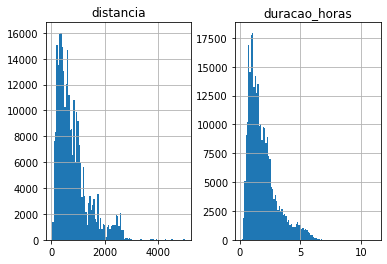

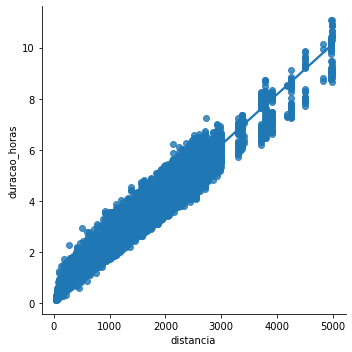

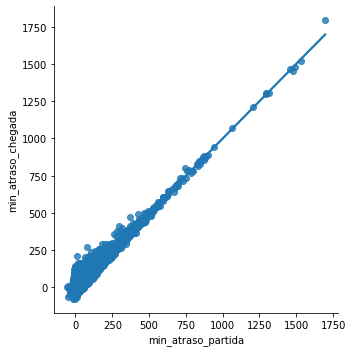

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flight_sample_df = flight_schema_df.sample(withReplacement=False, fraction=0.6, seed=10)
flight_sample_pd = flight_sample_df.toPandas()
flight_sample_df.printSchema()

flight_sample_pd.hist(bins=100, column=['distancia','duracao_horas'])
sns.lmplot(x='distancia', y='duracao_horas', data=flight_sample_pd)
sns.lmplot(x='min_atraso_partida', y='min_atraso_chegada', data=flight_sample_pd)

# Particionamento e otimização

Veremos algumas funções aqui que lidam diretamente com configurações relacionadas com o formato distribuído dos Dataframes em Spark.


### Criando IDs

Em um ambiente distribuído, criar IDs seguindo abordagens como contadores e geradores aleatórios não são ideais, dado que múltiplas partições irão lidar com múltiplos _pedaços_ dos dados. Utilizando a função `monotonically_increasing_id()` do pacote `pyspark.sql.functions` possibilita ao Spark criar IDs de forma distribuída e eficiente.

In [36]:
text_df.withColumn('ids', F.monotonically_increasing_id()).drop('id_linha').show()

+--------------------+--------------------+----------+------------+------------+---+
|               texto|              tokens|num_tokens|    primeiro|      ultimo|ids|
+--------------------+--------------------+----------+------------+------------+---+
|   dramatis personae|[dramatis, personae]|         2|    dramatis|    personae|  0|
|claudius king of ...|[claudius, king, ...|         6|    claudius|  claudius:)|  1|
|polonius lord cha...|[polonius, lord, ...|         5|    polonius|  polonius:)|  2|
|laertes son to po...|[laertes, son, to...|         4|     laertes|   polonius.|  3|
|lucianus nephew t...|[lucianus, nephew...|         5|    lucianus|       king.|  4|
|         voltimand ||      [voltimand, |]|         2|   voltimand|           ||  5|
|         cornelius ||      [cornelius, |]|         2|   cornelius|           ||  6|
|rosencrantz |  co...|[rosencrantz, |, ...|         4| rosencrantz|  courtiers.|  7|
|      guildenstern ||   [guildenstern, |]|         2|guildenster

### Manipulando partições

Muitas das vezes precisamos manipular em quantas partições dividimos nossos dados, para aumentar eficiência. Para manipular partições usamos as seguintes funções:

- `rdd.getNumPartitions()`: recupera a quantidade de partições seu RDD ou Dataframe está alocando.

- `repartition()`: modifica a quantidade de partições que seu RDD ou Dataframe está alocando.

- `coalesce()`: reduz a quantidade de partições (mais eficiente que `repartition()`.

In [38]:
print(text_df.rdd.getNumPartitions())

text_df = text_df.repartition(4)
print(text_df.rdd.getNumPartitions())

text_df = text_df.coalesce(3)
print(text_df.rdd.getNumPartitions())

2


4
3


### Caching

_Caching_ é a operação de guardar Dataframes na memória ou em disco. Essa operação pode ajudar a melhorar o desempenho em transformações tardias e reduzir a quantidade de recursos gastos. **Cuidado:** bases de dados muito grandes podem não caber na memória do cluster, e _swap_ com o disco pode ser custoso.

Para guardar em cache seu Dataframe, basta invocar a função `cache()`. Para tirá-lo do cache, utilize a função `unpersist()`.

In [41]:
flight_schema_df = flight_schema_df.cache()

start_time = time.time()
print(f'Contando {flight_schema_df.count()} em {time.time() - start_time}')
start_time = time.time()
print(f'Contando {flight_schema_df.count()} em {time.time() - start_time}')

flight_schema_df.unpersist().show(2)

Contando 476881 em 0.6213679313659668
Contando 476881 em 0.047644853591918945
+------------+--------+------+-------+------------------+------------------+---------+-----------------+
|id_companhia|num_voos|origem|destino|min_atraso_partida|min_atraso_chegada|distancia|    duracao_horas|
+------------+--------+------+-------+------------------+------------------+---------+-----------------+
|       19805|       1|   JFK|    LAX|              -6.0|               2.0|   2475.0|5.916666666666667|
|       19805|       2|   LAX|    JFK|              14.0|             -29.0|   2475.0|4.483333333333333|
+------------+--------+------+-------+------------------+------------------+---------+-----------------+
only showing top 2 rows



# Exemplo prático: pipeline de dados

Vamos fazer uma análise um pouco mais detalhada de um dataset. Vamos explorar o _"2017 St Paul MN Real Estate Dataset"_ e iremos tentar limpar e transformar ele para que seja utilizável por algum algoritmo de aprendizado de máquina para prever o **preço de venda** de um imóvel. Começaremos importando ele e checando seu Schema.

In [44]:
real_estate_df = spark.read.csv('file:///home/bigdata-vm/Desktop/BigDataAulasPUC/Datasets/2017_real_estate.csv', header=True, inferSchema=True)
real_estate_df.printSchema()

root
 |-- No: integer (nullable = true)
 |-- MLSID: string (nullable = true)
 |-- StreetNumberNumeric: integer (nullable = true)
 |-- streetaddress: string (nullable = true)
 |-- STREETNAME: string (nullable = true)
 |-- PostalCode: integer (nullable = true)
 |-- StateOrProvince: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SalesClosePrice: integer (nullable = true)
 |-- LISTDATE: string (nullable = true)
 |-- LISTPRICE: integer (nullable = true)
 |-- LISTTYPE: string (nullable = true)
 |-- OriginalListPrice: integer (nullable = true)
 |-- PricePerTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: integer (nullable = true)
 |-- FENCE: string (nullable = true)
 |-- MapLetter: string (nullable = true)
 |-- LotSizeDimensions: string (nullable = true)
 |-- SchoolDistrictNumber: string (nullable = true)
 |-- DAYSONMARKET: integer (nullable = true)
 |-- offmarketdate: string (nullable = true)
 |-- Fireplaces: integer (nullable = true)
 |-- RoomArea4: string (nullable = 

Olhando o Schema, conseguimos ver que a variável que gostaríamos de prever é a `SalesClosePrice`. Vamos ver sua distribuição.

In [45]:
Y_df = real_estate_df.select('SalesClosePrice')
Y_df.describe().show()

+-------+------------------+
|summary|   SalesClosePrice|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|             48000|
|    max|           1700000|
+-------+------------------+



Precisamos escolher características (colunas) que possam ajudar o sistema a aprender o preço de cada venda. Vamos começar escolhendo variáveis que tenham uma boa correlação com `SalesClosePrice`. Correlação nem sempre implica em características relevantes, mas é um bom lugar pra começar.

In [46]:
list_columns = ['LISTPRICE', 'FOUNDATIONSIZE', 'DAYSONMARKET', 'Fireplaces', 'SQFTABOVEGROUND', 'LivingArea', 'YEARBUILT', 'ACRES', 'BATHSTOTAL', 'Bedrooms', 'SQFTBELOWGROUND']
dict_corr = {}
for column in list_columns:
    dict_corr[column] = real_estate_df.corr('SalesClosePrice', column)
print(dict_corr)

{'LISTPRICE': 0.9966856408762303, 'FOUNDATIONSIZE': 0.6152231695664402, 'DAYSONMARKET': 0.10140339667725148, 'Fireplaces': 0.5750292168651635, 'SQFTABOVEGROUND': 0.7901878498502957, 'LivingArea': 0.8162701823275637, 'YEARBUILT': 0.23475142032506482, 'ACRES': 0.22060612588935333, 'BATHSTOTAL': 0.6922501532803715, 'Bedrooms': 0.5348605700654713, 'SQFTBELOWGROUND': 0.45613267313494893}


Mas apenas a correlação não me convence. Quero analisar também estas colunas tentando traçar modelos lineares entre tais variáveis e `SalesClosePrice`. 

2021-12-11 15:49:59,983 WARN util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


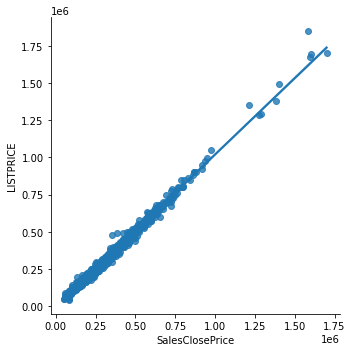

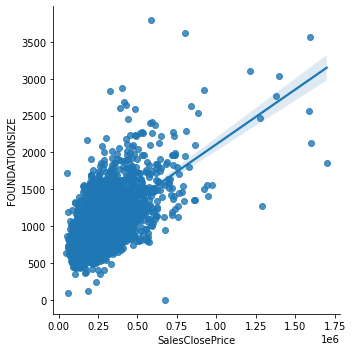

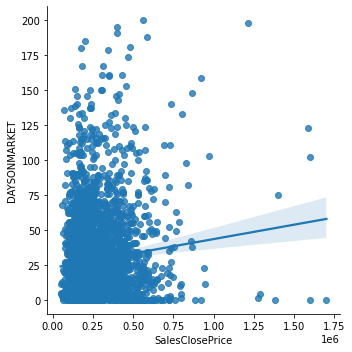

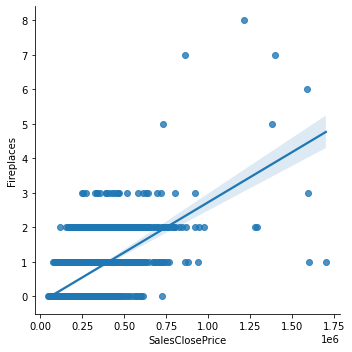

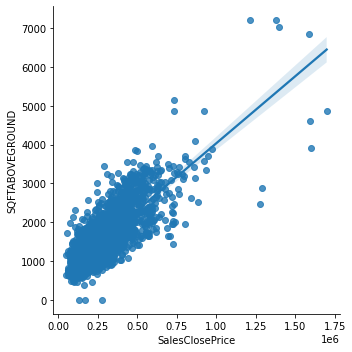

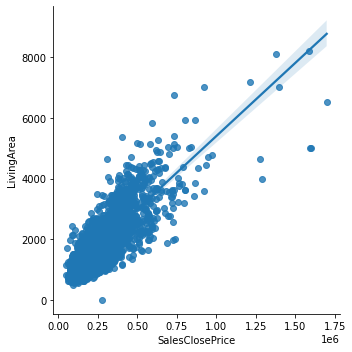

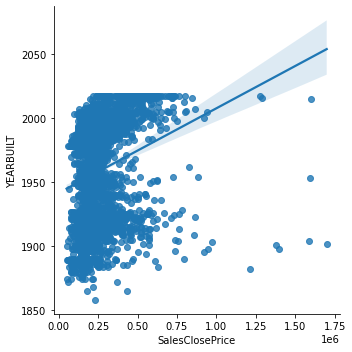

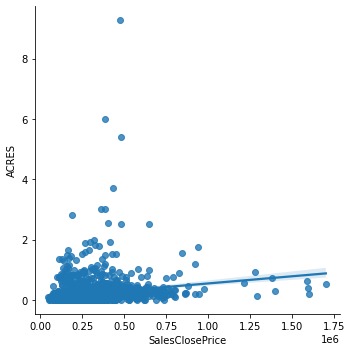

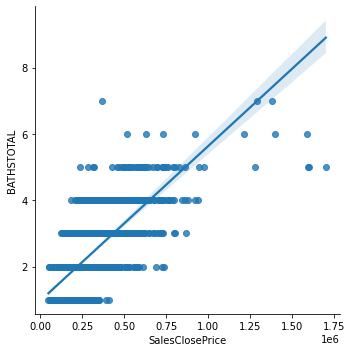

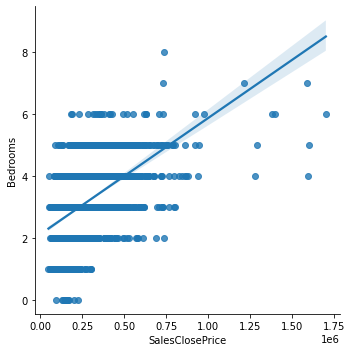

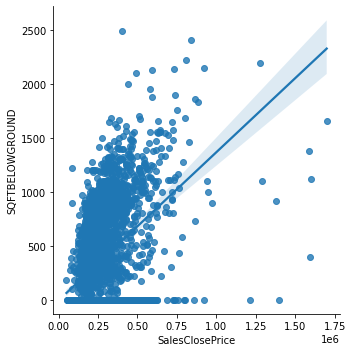

In [47]:
real_estate_pd = real_estate_df.sample(withReplacement=False, fraction=0.7, seed=10).toPandas()

for column in list_columns:
    sns.lmplot(x='SalesClosePrice', y=column, data=real_estate_pd)

Analisando os gráficos, estou convencido que algumas dessas colunas são realmente importantes. Vou escolhê-las e filtrar `real_estate_df` de modo que mantenha apenas elas.

In [48]:
final_list = ['SalesClosePrice', 'LISTPRICE', 'FOUNDATIONSIZE', 'LivingArea', 'BATHSTOTAL', 'Bedrooms']

real_estate_df = real_estate_df.select('No', *final_list)
real_estate_df.show()

+---+---------------+---------+--------------+----------+----------+--------+
| No|SalesClosePrice|LISTPRICE|FOUNDATIONSIZE|LivingArea|BATHSTOTAL|Bedrooms|
+---+---------------+---------+--------------+----------+----------+--------+
|  1|         143000|   139900|           980|       980|         2|       3|
|  2|         190000|   210000|          1144|      2228|         3|       4|
|  3|         225000|   225000|          1102|      1102|         1|       2|
|  4|         265000|   230000|           959|      1632|         2|       2|
|  5|         249900|   239900|          1026|      2052|         2|       3|
|  6|         255000|   239900|          1152|      1397|         2|       3|
|  7|         248000|   250000|           700|      1798|         3|       3|
|  8|         245000|   254990|          1088|      1733|         3|       3|
|  9|         254990|   254990|          1088|      1733|         3|       3|
| 10|         250000|   255990|          1088|      1733|       

Há duplicatas? E valores nulos? Se sim, vamos removê-los. 

In [50]:
print(real_estate_df.count())
real_estate_df = real_estate_df.distinct() \
                                .filter(real_estate_df['LISTPRICE'].isNotNull()) \
                                .filter(real_estate_df['FOUNDATIONSIZE'].isNotNull()) \
                                .filter(real_estate_df['LivingArea'].isNotNull()) \
                                .filter(real_estate_df['BATHSTOTAL'].isNotNull()) \
                                .filter(real_estate_df['Bedrooms'].isNotNull())

print(real_estate_df.count())

5000
5000


Ótimo, não tinhamos nenhum problema com dados faltantes. O próximo passo é normalizarmos os dados. Eles estão com magnitudes diferentes, o que pode interferir no aprendizado do modelo. Podemos utilizar a normalização em z-score para aproximá-los a uma distribuição normal. Vamos fazer o exemplo com `LISTPRICE`.

+----+---------------+---------+--------------+----------+----------+--------+--------------------+
|  No|SalesClosePrice|LISTPRICE|FOUNDATIONSIZE|LivingArea|BATHSTOTAL|Bedrooms|         LISTPRICE_z|
+----+---------------+---------+--------------+----------+----------+--------+--------------------+
| 130|         556873|   556873|          1757|      2984|         3|       3|   2.038663747405958|
| 459|         249900|   239900|          1245|      1705|         3|       2|-0.16339234232865613|
| 786|         168500|   189900|           572|      1584|         2|       2| -0.5107493868931166|
| 872|         239000|   245000|          1159|      1799|         2|       4| -0.1279619237830812|
|1709|         160000|   159900|           884|      1727|         2|       3| -0.7191636136317928|
|1744|         163000|   163000|           832|      1522|         3|       3| -0.6976274768687962|
|1764|         159000|   164900|           880|      1363|         2|       2| -0.6844279091753467|


array([[<AxesSubplot:title={'center':'LISTPRICE'}>]], dtype=object)

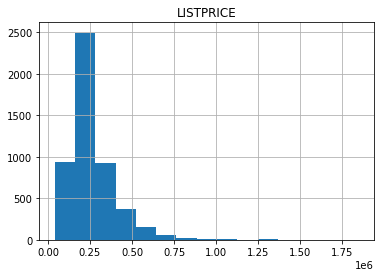

In [52]:
def z_norm(num, mean, stddev):
    return (num - mean)/stddev

z_nomr_udf = F.udf(z_norm, types.DoubleType())
mean_listprice = real_estate_df.agg({'LISTPRICE': 'mean'}).collect()[0][0]
stddev_listprice = real_estate_df.agg({'LISTPRICE': 'stddev'}).collect()[0][0]

real_estate_df = real_estate_df.withColumn('LISTPRICE_z', z_nomr_udf(real_estate_df.LISTPRICE, F.lit(mean_listprice), F.lit(stddev_listprice)))
print(real_estate_df.show()) 

listprice_pd = real_estate_df.select('LISTPRICE').toPandas()
listprice_pd.hist(bins=15)

Uma vez que todas as colunas estão normalizadas, o dataset está pronto para ser consumido por algum algoritmo de aprendizado de máquina! Bom trabalho!